In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import casadi

## 1 - Manufacturer data

In [2]:
Q_max_table = [[0,-25,-20,-15,-7,-4,-2,2,7,10,15,18,20,35],
      [30,8750,10130,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [35,8500,10000,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [40,8250,9880,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [45,8000,9750,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [50,9630,9630,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [55,11500,11500,11500,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [60,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000],
      [65,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000]]

COP_table = [[0,-25,-20,-15,-7,-4,-2,2,7,10,15,18,20,35],
      [30,2.13,2.34,2.55,3.15,3.36,3.47,3.69,4.93,5.22,5.99,6.29,6.49,7.98],
      [35,1.85,2.13,2.40,3.00,3.17,3.28,3.50,4.60,4.87,5.56,5.84,6.02,7.41],
      [40,1.58,1.91,2.25,2.85,2.97,3.09,3.31,4.27,4.51,5.13,5.39,5.56,6.84],
      [45,1.30,1.70,2.10,2.70,2.78,2.90,3.12,3.93,4.16,4.71,4.94,5.10,6.28],
      [50,1.49,1.49,1.95,2.55,2.59,2.71,2.93,3.60,3.81,4.28,4.49,4.64,5.71],
      [55,1.80,1.80,1.80,2.40,2.39,2.53,2.73,2.80,3.46,3.85,4.05,4.17,5.14],
      [60,2.25,2.25,2.25,2.25,2.20,2.34,2.54,2.60,3.10,3.43,3.60,3.71,4.57],
      [65,2.05,2.05,2.05,2.05,2.05,2.15,2.35,2.60,2.75,3.00,3.15,3.25,4.00]]

# Get the mass flow rate for a given LWT
def m_HP(T):
    if   T<=45: m = 34.5/60
    elif T<=55: m = 21.6/60
    elif T<=65: m = 17.3/60
    return round(m,2)

In [3]:
Q_max = pd.DataFrame(Q_max_table[1:], columns=Q_max_table[0]).T
Q_max.columns = Q_max.iloc[0]
Q_max = Q_max[1:]
print("Maximum Q_HP:")
display(Q_max)

# The minimum heating power is assumed to be 30% of the maximum
Q_min = Q_max * 0.3
Q_min = Q_min.round(1)
print("Minimum Q_HP:")
display(Q_min)

COP = pd.DataFrame(COP_table[1:], columns=COP_table[0]).T
COP.columns = COP.iloc[0]
COP = COP[1:]
print("COP:")
display(COP)

Maximum Q_HP:


,30,35,40,45,50,55,60,65
-25,8750,8500,8250,8000,9630,11500,12000,12000
-20,10130,10000,9880,9750,9630,11500,12000,12000
-15,11500,11500,11500,11500,11500,11500,12000,12000
-7,12000,12000,12000,12000,12000,12000,12000,12000
-4,12000,12000,12000,12000,12000,12000,12000,12000
-2,12000,12000,12000,12000,12000,12000,12000,12000
2,12000,12000,12000,12000,12000,12000,12000,12000
7,12000,12000,12000,12000,12000,12000,12000,12000
10,12000,12000,12000,12000,12000,12000,12000,12000
15,12000,12000,12000,12000,12000,12000,12000,12000


Minimum Q_HP:


,30,35,40,45,50,55,60,65
-25,2625.0,2550.0,2475.0,2400.0,2889.0,3450.0,3600.0,3600.0
-20,3039.0,3000.0,2964.0,2925.0,2889.0,3450.0,3600.0,3600.0
-15,3450.0,3450.0,3450.0,3450.0,3450.0,3450.0,3600.0,3600.0
-7,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
-4,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
-2,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
2,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
7,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
10,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
15,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0


COP:


,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0
-25,2.13,1.85,1.58,1.30,1.49,1.80,2.25,2.05
-20,2.34,2.13,1.91,1.70,1.49,1.80,2.25,2.05
-15,2.55,2.40,2.25,2.10,1.95,1.80,2.25,2.05
-7,3.15,3.00,2.85,2.70,2.55,2.40,2.25,2.05
-4,3.36,3.17,2.97,2.78,2.59,2.39,2.20,2.05
-2,3.47,3.28,3.09,2.90,2.71,2.53,2.34,2.15
2,3.69,3.50,3.31,3.12,2.93,2.73,2.54,2.35
7,4.93,4.60,4.27,3.93,3.60,2.80,2.60,2.60
10,5.22,4.87,4.51,4.16,3.81,3.46,3.10,2.75
15,5.99,5.56,5.13,4.71,4.28,3.85,3.43,3.00


## 2 - Forecasts and parameters

In [4]:
# Electricity prices [cts/kWh] option 1 (GridWorks)
c_el = [6.36, 6.34, 6.34, 6.37, 6.41, 6.46, 6.95, 41.51, \
        41.16, 41.07, 41.06, 41.08, 7.16, 7.18, 7.18, 7.16, 41.2, 41.64,\
        41.43, 41.51, 6.84, 6.65, 6.46, 6.4]

# Electricity prices [cts/kWh] option 2 (progressive)
c_el = [18.97, 18.92, 18.21, 16.58, 16.27, 15.49, 14.64,\
        18.93, 45.56, 26.42, 18.0, 17.17, 16.19, 30.74, 31.17, 16.18,\
        17.11, 20.24, 24.94, 24.69, 26.48, 30.15, 23.14, 24.11]

# Outside air temperature (°C)
T_OA_list = [2]*5 + [7]*15 + [2]*4

# Load (kWh)
load = [5.91, 5.77, 5.67, 5.77, 5.71, 6.06, 6.34, 6.34, 6.01, 5.77, 5.05, 5.05, 4.91, 4.91, 4.91, 4.91, 5.05, 5.1, 4.91, 4.91, 4.91, 4.91, 4.98, 4.91]
#load = [x/2 for x in load]

# The temperature of the water returning from the PCM to the HP (°C)
T_HP_in = 55

# The horizon
N = len(c_el)

# The maximum storage capacity (kWh)
max_storage = 30

## 3 - Hourly available heating power and prices per kWh_th

In [5]:
# Get the LWT options available at a given T_OA and T_HP_in
def get_LWT_options(T_OA, elec, T_HP_in, PRINT):
        
    # Range (min,max) of acceptable Q_HP for each LWT option at the given T_OA
    LWT_options = [list[0] for list in Q_max_table][1:]
    Q_max_by_LWT = [Q_max[column][T_OA] for column in Q_max.columns]
    Q_min_by_LWT = [round(Q_min[column][T_OA]) for column in Q_min.columns]
    
    # Find the LWT(s) that are attainable within this range of Q_HP
    available_LWT = []
    for i in range(len(LWT_options)):
        # The heat needed to attain that LWT
        Q_HP = round(m_HP(LWT_options[i])*4187*(LWT_options[i]-T_HP_in),1)
        # If it can be attained
        if Q_HP <= Q_max_by_LWT[i] and Q_HP >= Q_min_by_LWT[i]:
            if PRINT: print(f"[OK] LWT = {LWT_options[i]}°C, m_HP = {m_HP(LWT_options[i])} kg/s \
            would use Q_HP = {round(Q_HP/1000,1)} kW")
            available_LWT.append(LWT_options[i])
        # If it can not be attained
        else:
            if PRINT: print(f"[--] LWT = {LWT_options[i]}°C, m_HP = {m_HP(LWT_options[i])} kg/s \
            would use Q_HP = {round(Q_HP/1000,1)} kW")
    
    # The corresponding prices and Q_HP ranges
    for LWT in available_LWT:
        Q_HP = m_HP(LWT)*4187*(LWT-T_HP_in)/1000
        W_HP = Q_HP/COP[LWT][T_OA]
        if PRINT:
            print(f"\n{LWT}°C water is possible:")
            print(f"Requires {round(Q_HP,1)} kW_th => {round(W_HP,1)} kW_elec at {round(W_HP*elec,1)} cts/kWh => [{round(W_HP*elec/Q_HP,2)} cts/kWh_th]")
            print(f"The Q_HP range for this LWT is => [{round(Q_HP,1)}, {round(Q_max[LWT][T_OA]/1000)}] kW")

    # There is generally only one LWT option. Save the range and cost for the given hour.
    Q_HP_min = round(Q_HP,3)
    Q_HP_max = round(Q_max[LWT][T_OA]/1000,3)
    cost_th = round(W_HP*elec/Q_HP,3)
    
    return Q_HP_min, Q_HP_max, cost_th

In [6]:
# For each hour, find the available Q_HP range and price per kWh_th
def get_ranges_and_costs(c_el, T_OA_list, T_HP_in, PRINT):

    if PRINT:
        print("**************************************")
        print(f"Assuming water going to the HP at {T_HP_in}°C")
        print("**************************************")
    
    Q_HP_min_list, Q_HP_max_list, cost_th_list = [], [], []
    for i in range(len(c_el)):

        if PRINT:
            print("\n----------------------------------------")
            print(f"Hour {i+1} ({T_OA_list[i]}°C outside, {c_el[i]} cts/kWh)")
            print("----------------------------------------\n")
        
        Q_HP_min, Q_HP_max, cost_th = get_LWT_options(T_OA_list[i], c_el[i], T_HP_in, PRINT)
    
        # Append the values in lists
        Q_HP_min_list.append(Q_HP_min)    
        Q_HP_max_list.append(Q_HP_max)
        cost_th_list.append(cost_th)

    return Q_HP_min_list, Q_HP_max_list, cost_th_list

Q_HP_min_list, Q_HP_max_list, cost_th_list = get_ranges_and_costs(c_el, T_OA_list, T_HP_in, True)

**************************************
Assuming water going to the HP at 55°C
**************************************

----------------------------------------
Hour 1 (2°C outside, 18.97 cts/kWh)
----------------------------------------

[--] LWT = 30°C, m_HP = 0.57 kg/s             would use Q_HP = -59.7 kW
[--] LWT = 35°C, m_HP = 0.57 kg/s             would use Q_HP = -47.7 kW
[--] LWT = 40°C, m_HP = 0.57 kg/s             would use Q_HP = -35.8 kW
[--] LWT = 45°C, m_HP = 0.57 kg/s             would use Q_HP = -23.9 kW
[--] LWT = 50°C, m_HP = 0.36 kg/s             would use Q_HP = -7.5 kW
[--] LWT = 55°C, m_HP = 0.36 kg/s             would use Q_HP = 0.0 kW
[OK] LWT = 60°C, m_HP = 0.29 kg/s             would use Q_HP = 6.1 kW
[--] LWT = 65°C, m_HP = 0.29 kg/s             would use Q_HP = 12.1 kW

60°C water is possible:
Requires 6.1 kW_th => 2.4 kW_elec at 45.3 cts/kWh => [7.47 cts/kWh_th]
The Q_HP range for this LWT is => [6.1, 12] kW

----------------------------------------
Hour 2 (

## 4 - Pareto algorithm

In [7]:
def get_pareto(cost_th_list, load, max_storage, PRINT):
    
    # Treat for duplicates
    for i in range(N):
        for j in range(N):
            if i!=j and cost_th_list[i] == cost_th_list[j]:
                cost_th_list[j] = cost_th_list[j] + random.uniform(-0.5, 0.5)

    # Ranking the hourly costs ($/kWh_th)
    ranking = [sorted(cost_th_list).index(x) for x in cost_th_list]
    
    if PRINT: print(f"Ranking hours by $/kWh_th:\n{ranking}\n")
    
    # Initialize
    storage = [0 for i in range(N+1)]
    Q_HP = [0 for i in range(N)]
    problem_solved = False
    ok = [1]*N
    last_not_ok = N-2
    testing = [round(x,4) for x in storage]
    
    #------------------------------------------------------
    # For the first hour
    #------------------------------------------------------
    
    # If the storage can not provide the first hour
    if load[0] > storage[0]:
        # Try to supply the exact remaining load with the HP
        if load[0] - storage[0] > Q_HP_min_list[0]: 
            Q_HP[0] = load[0] - storage[0]
        else: 
            Q_HP[0] = Q_HP_min_list[0]
    
    # Update the state of the system
    for j in range(N):
        if Q_HP[j]-load[j]+storage[j] >= 0:
            storage[j+1] = Q_HP[j]-load[j]+storage[j]
            ok[j] = 0
    
    #------------------------------------------------------
    # For all other hours, by ranking
    #------------------------------------------------------
    
    for i in range(N):
    
        # The first hour has already been treated
        if ranking.index(i) == 0: 
            continue
    
        if PRINT: 
            print("-----------------------------------")
            print(f"{ranking.index(i)}:00-{ranking.index(i)+1}:00, the cheapest hour n°{i+1}")
            print("-----------------------------------")
    
        # Skip if the hour is past a point where everything is ok
        if ranking.index(i) > last_not_ok:
            if PRINT: 
                print(f"Everything is OK after {last_not_ok+1}:00")
                print(f"There is no point in using the HP at {ranking.index(i)}:00.")
            continue
    
        #------------------------------------------------------
        # Use the maximum Q_HP you can in the best remaining hour
        #------------------------------------------------------
        
        # Try the maximum Q_HP
        Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)]
    
        # Check if this violates the max storage constraint
        total_violation = 0
        testing = [round(x,4) for x in storage]
        for j in range(N):
            if Q_HP[j]-load[j]+testing[j] >= 0:
                testing[j+1] = Q_HP[j]-load[j]+testing[j]
                if testing[j+1] > max_storage:
                    # print(f"Violation: {round(testing[j+1]-max_storage,1)} kW too much")
                    total_violation += testing[j+1]-max_storage
    
        # If the maximum heating power can be used
        if total_violation == 0:
            if PRINT: print(f"The maximum Q_HP can be used at this time.")
            for j in range(N):
                if Q_HP[j]-load[j]+storage[j] >= 0:
                    storage[j+1] = Q_HP[j]-load[j]+storage[j]
                    ok[j] = 0
    
        # If the max storage is violated
        else:
            if PRINT: print(f"Need to use {round(total_violation,1)} less kW than the maximum.")
            
            # See if you can reduce the Q_HP at that time
            if Q_HP_max_list[ranking.index(i)] - total_violation > Q_HP_min_list[ranking.index(i)]:
                if PRINT: print(f"Feasible, reduced the HP power.")
                Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)] - total_violation
                for j in range(N-1):
                    if Q_HP[j]-load[j]+storage[j] >= 0:
                        storage[j+1] = Q_HP[j]-load[j]+storage[j]
                        ok[j] = 0
                
            # If not, turn off the HP at that time
            else:
                if PRINT: print(f"Infeasible, turned off the HP at this time.")
                Q_HP[ranking.index(i)] = 0
                for j in range(N):
                    if Q_HP[j]-load[j]+storage[j] >= 0:
                        storage[j+1] = Q_HP[j]-load[j]+storage[j]
                        ok[j] = 0
         
        #------------------------------------------------------
        # Identify if the load is satisfied after a certain time
        #------------------------------------------------------
    
        # Is the system now ok after a certain hour?
        if sum(ok)>=1:
            last_not_ok = len(ok) - ok[::-1].index(1) - 1
            
        # If all loads are satisfied
        if sum(ok)==0:    
            if PRINT: print("\n***************\nProblem solved!\n***************")
            problem_solved = True
            break
            
        #------------------------------------------------------
        # Plot the current iteration
        #------------------------------------------------------
    
        if PRINT:

            # Duplicate the last element of the hourly data for the plot
            cost_th_list2 = cost_th_list + [cost_th_list[-1]]
            Q_HP2 = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
            load2 = load + [load[-1]]

            # Plot the current state of the system
            fig, ax = plt.subplots(1,1, figsize=(13,4))
            ax2 = ax.twinx()
            ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
            ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
            ax.step(range(N+1), Q_HP2, where='post', color='blue', alpha=0.5, label='HP')
            ax.plot(storage, color='orange', alpha=0.6, label='Storage')
            ax.set_ylim([0,35])
            ax.set_xticks(range(N+1))
            ax.set_xlabel("Time [hours]")
            ax.set_ylabel("Heat [kWh_th]")
            ax2.set_ylabel("Price [cts/kWh_th]")
            lines1, labels1 = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax.legend(lines1 + lines2, labels1 + labels2)
            plt.show()

    # If there are some remaining problems
    if not problem_solved:
        start_idx = None
        for i, value in enumerate(ok):
            if value == 1 and start_idx is None:
                start_idx = i
            elif value == 0 and start_idx is not None:
                print(f"The load is not satisfied from {start_idx} to {i}")
                start_idx = None

    # Calculate the total cost and energy
    total_cost = 0
    for i in range(N):
        total_cost += Q_HP[i]*cost_th_list[i]
    total_cost = round(total_cost/100,2)
    total_energy = round(sum(load),1)

    return Q_HP, storage, ok, total_cost, total_energy

Ranking hours by $/kWh_th:
[12, 11, 9, 5, 4, 1, 0, 10, 23, 18, 8, 7, 3, 20, 22, 2, 6, 13, 17, 16, 19, 21, 14, 15]

-----------------------------------
6:00-7:00, the cheapest hour n°1
-----------------------------------
The maximum Q_HP can be used at this time.


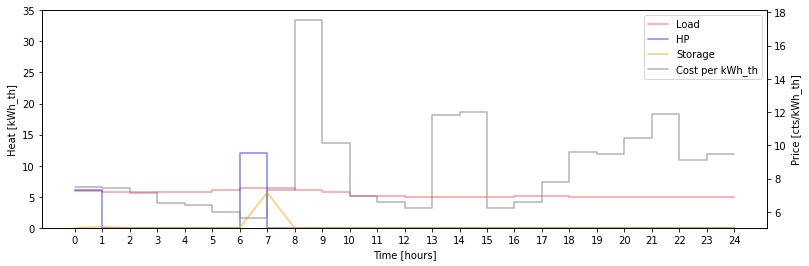

-----------------------------------
5:00-6:00, the cheapest hour n°2
-----------------------------------
The maximum Q_HP can be used at this time.


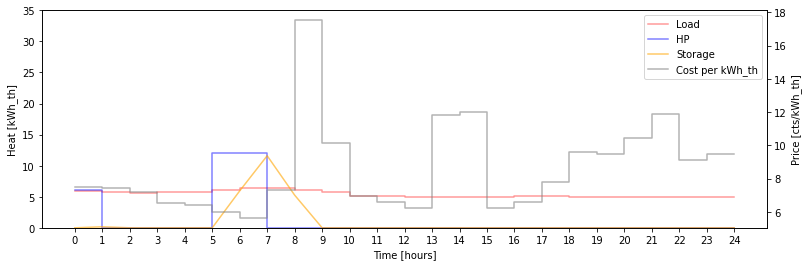

-----------------------------------
15:00-16:00, the cheapest hour n°3
-----------------------------------
The maximum Q_HP can be used at this time.


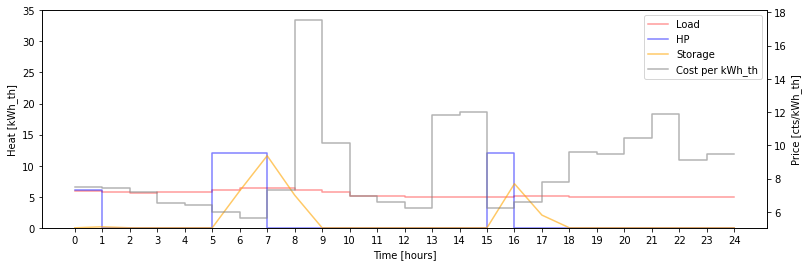

-----------------------------------
12:00-13:00, the cheapest hour n°4
-----------------------------------
The maximum Q_HP can be used at this time.


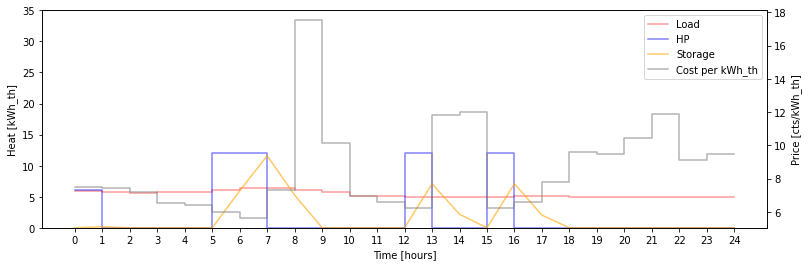

-----------------------------------
4:00-5:00, the cheapest hour n°5
-----------------------------------
The maximum Q_HP can be used at this time.


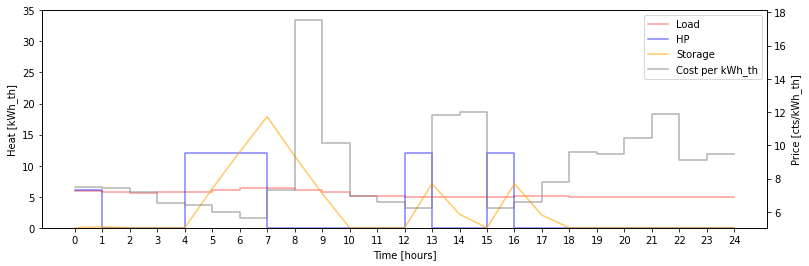

-----------------------------------
3:00-4:00, the cheapest hour n°6
-----------------------------------
The maximum Q_HP can be used at this time.


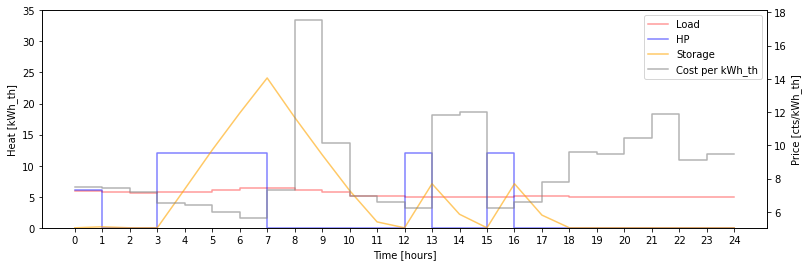

-----------------------------------
16:00-17:00, the cheapest hour n°7
-----------------------------------
The maximum Q_HP can be used at this time.


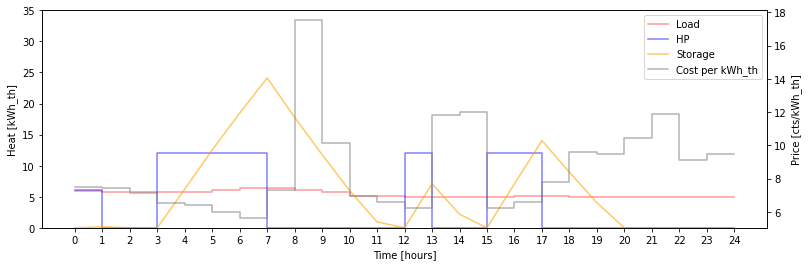

-----------------------------------
11:00-12:00, the cheapest hour n°8
-----------------------------------
The maximum Q_HP can be used at this time.


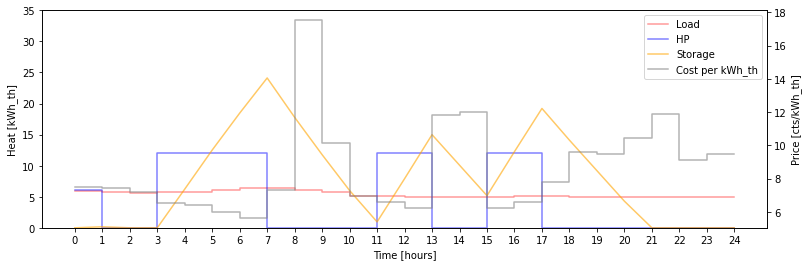

-----------------------------------
10:00-11:00, the cheapest hour n°9
-----------------------------------
Need to use 1.2 less kW than the maximum.
Feasible, reduced the HP power.


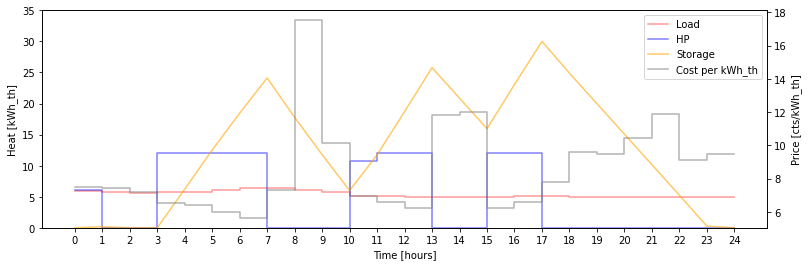

-----------------------------------
2:00-3:00, the cheapest hour n°10
-----------------------------------
Need to use 10.1 less kW than the maximum.
Infeasible, turned off the HP at this time.


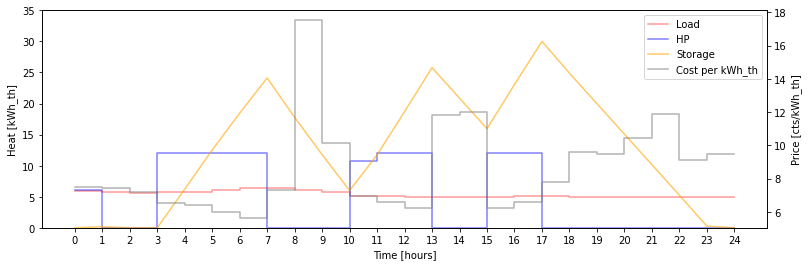

-----------------------------------
7:00-8:00, the cheapest hour n°11
-----------------------------------
Need to use 37.3 less kW than the maximum.
Infeasible, turned off the HP at this time.


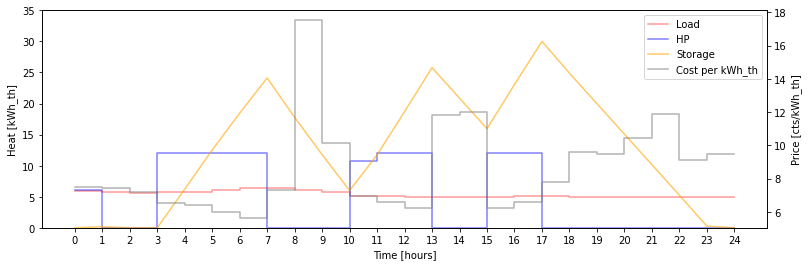

-----------------------------------
1:00-2:00, the cheapest hour n°12
-----------------------------------
Need to use 0.7 less kW than the maximum.
Feasible, reduced the HP power.


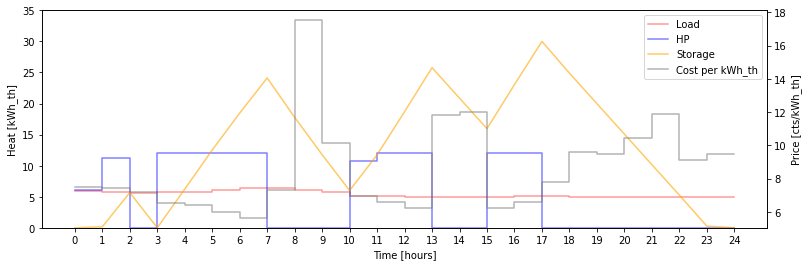

-----------------------------------
17:00-18:00, the cheapest hour n°14
-----------------------------------
Need to use 8.9 less kW than the maximum.
Infeasible, turned off the HP at this time.


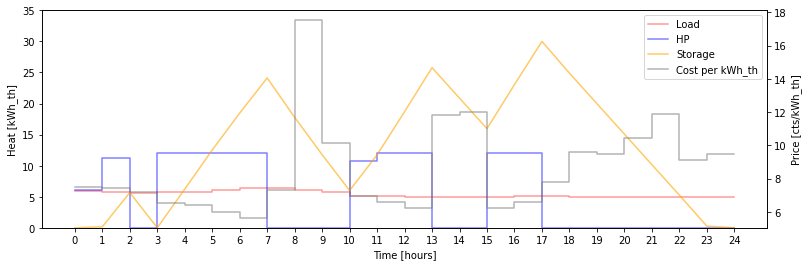

-----------------------------------
22:00-23:00, the cheapest hour n°15
-----------------------------------
The maximum Q_HP can be used at this time.

***************
Problem solved!
***************


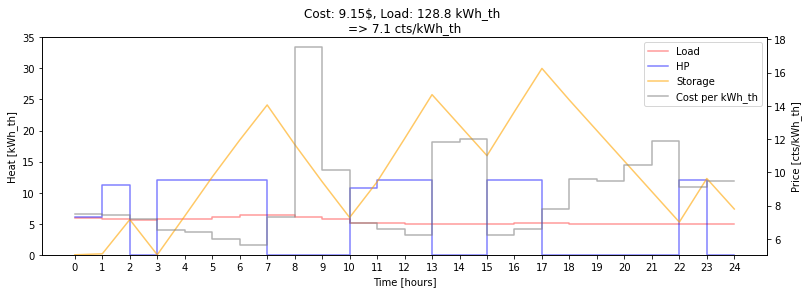

In [8]:
# Get the values from the algorithm
Q_HP, storage, ok, total_cost, total_energy = get_pareto(cost_th_list, load, max_storage, True)

# Duplicate the last element of the hourly data for the plot
cost_th_list2 = cost_th_list + [cost_th_list[-1]]
Q_HP = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
load2 = load + [load[-1]]

# Plot the state of the system
fig, ax = plt.subplots(1,1, figsize=(13,4))
plt.title(f"Cost: {total_cost}$, Load: {total_energy} kWh_th \n=> {round(100*total_cost/total_energy,2)} cts/kWh_th")
ax2 = ax.twinx()
ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
ax.step(range(N+1), Q_HP, where='post', color='blue', alpha=0.5, label='HP')
ax.plot(storage, color='orange', alpha=0.6, label='Storage')
ax.set_ylim([0,35])
ax.set_xticks(range(N+1))
ax.set_xlabel("Time [hours]")
ax.set_ylabel("Heat [kWh_th]")
ax2.set_ylabel("Price [cts/kWh_th]")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)

start_idx = None
for i, value in enumerate(ok):
    if value == 1 and start_idx is None:
        start_idx = i
    elif value == 0 and start_idx is not None:
        ax.axvspan(start_idx, i, facecolor='red', alpha=0.1)
        start_idx = None

plt.show()

## 5 - Optimization algorithm

In [9]:
def get_opti(cost_th_list, load, max_storage):

    opti = casadi.Opti('conic')

    # Parameter (storage kWh at end of horizon)
    storage_final = 0
    # Normal values (when not comparing with Pareto)
    # max_storage = 12
    # storage_final = 5
        
    # Variables
    Q_HP = opti.variable(1,N) # input
    storage = opti.variable(1,N+1) # state
    HP_on_off = opti.variable(1,N) # input
    Q_HP_onoff = opti.variable(1,N) # input (derived)
    
    # HP_on_off is a discrete variable (binary)
    discrete_var = [0]*N + [0]*(N+1) + [1]*N + [0]*N
    
    # Solver
    opti.solver('gurobi', {'discrete':discrete_var, 'gurobi.OutputFlag':0})
    
    # Constraints on storage (state)
    for t in range(N+1):
    
        # Initial and final storage
        opti.subject_to(storage[0] == 0)
        opti.subject_to(storage[N] == storage_final)
        
        # Minimum and maximum storage
        opti.subject_to(storage[t] >= 0)
        opti.subject_to(storage[t] <= max_storage)
        
        # System dynamics
        if t < N: opti.subject_to(storage[t+1] == Q_HP_onoff[t] - load[t] + storage[t])
    
    # Constraints on Q_HP and HP_on_off (inputs)
    for t in range(N):
    
        # Delta is binary
        opti.subject_to(HP_on_off[t] >= 0)
        opti.subject_to(HP_on_off[t] <= 1)
    
        # Q_HP is in a range
        opti.subject_to(Q_HP[t] <= Q_HP_max_list[t])    
        opti.subject_to(Q_HP[t] >= Q_HP_min_list[t]*HP_on_off[t])
    
        # Bilinear to linear
        opti.subject_to(Q_HP_onoff[t] <= Q_HP_max_list[t]*HP_on_off[t])
        opti.subject_to(Q_HP_onoff[t] >= Q_HP_min_list[t]*HP_on_off[t])
        opti.subject_to(Q_HP_onoff[t] <= Q_HP[t] + Q_HP_min_list[t]*(HP_on_off[t]-1))
        opti.subject_to(Q_HP_onoff[t] >= Q_HP[t] + Q_HP_max_list[t]*(HP_on_off[t]-1))
    
    # Objective
    obj = sum(Q_HP_onoff[t]*cost_th_list[t] for t in range(N))
    opti.minimize(obj)
    
    # Solve and get optimal values
    sol = opti.solve()
    Q_opt = sol.value(Q_HP_onoff)
    stor_opt = sol.value(storage)
    HP_on_off_opt = sol.value(HP_on_off)
    obj_opt = round(sol.value(obj)/100,2)

    return Q_opt, stor_opt, HP_on_off_opt, obj_opt

Academic license - for non-commercial use only
Academic license - for non-commercial use only


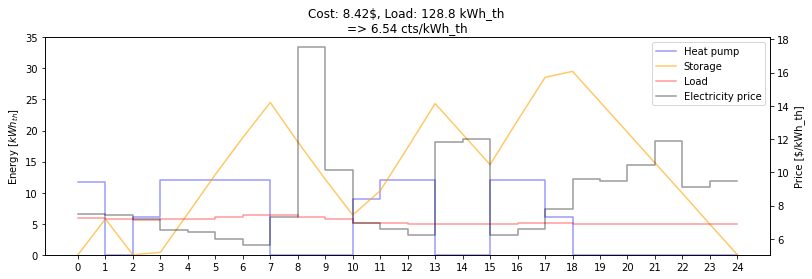

In [10]:
Q_opt, stor_opt, HP_on_off_opt, obj_opt = get_opti(cost_th_list, load, max_storage)

# Duplicate the last element of the hourly data for the plot
cost_th_list2 = cost_th_list + [cost_th_list[-1]]
Q_opt = [round(x,3) for x in Q_opt] + [Q_opt[-1]]
load2 = load + [load[-1]]

# Plot
fig, ax = plt.subplots(1,1, figsize=(13,4))
ax.step(range(N+1), Q_opt, where='post', label='Heat pump', alpha=0.4, color='blue')
ax.plot(range(N+1), stor_opt, label='Storage', alpha=0.6, color='orange')
ax.step(range(N+1), load2, where='post', label='Load', alpha=0.4, color='red')
ax.set_xticks(range(N+1))
ax.set_ylabel("Energy [$kWh_{th}$]")
plt.title(f"Cost: {obj_opt}$, Load: {round(sum(load),1)} kWh_th \n=> {round(100*obj_opt/sum(load),2)} cts/kWh_th")
ax2 = ax.twinx()
ax.set_ylim([0,35])
ax2.set_ylabel("Price [$/kWh_th]")
ax2.step(range(N+1), cost_th_list2, where='post', label='Electricity price', color='black', alpha = 0.4)
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)
plt.show()

## 6 - Comparison

In [11]:
def comparison(max_storage):

    # Get optimal
    Q_opt, stor_opt, HP_on_off_opt, obj_opt = get_opti(cost_th_list, load, max_storage)

    # Get pareto
    Q_HP, storage, ok, total_cost, total_energy = get_pareto(cost_th_list, load, max_storage, False)
    
    # Duplicate the last element of the hourly data for the plot
    cost_th_list2 = cost_th_list + [cost_th_list[-1]]
    load2 = load + [load[-1]]
    Q_opt = [round(x,3) for x in Q_opt] + [Q_opt[-1]]
    Q_HP = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
    
    # Plot the differeence
    fig, ax = plt.subplots(1,1, figsize=(13,4))
    ax.step(range(N+1), Q_opt, where='post', label='Heat pump - optimal', alpha=0.4, color='blue', linestyle='dashed')
    ax.step(range(N+1), Q_HP, where='post', label='Heat pump - pareto', alpha=0.4, color='blue')
    ax.plot(range(N+1), stor_opt, label='Storage - optimal', alpha=0.6, color='orange', linestyle='dashed')
    ax.plot(range(N+1), storage, label='Storage - pareto', alpha=0.6, color='orange')
    ax.step(range(N+1), load2, where='post', label='Load', alpha=0.2, color='red')
    ax.set_xticks(range(N+1))
    ax.set_ylabel("Energy [$kWh_{th}$]")
    plt.legend()
    ax2 = ax.twinx()
    ax.set_ylim([0,35])
    ax2.set_ylabel("Price [$/kWh_th]")
    ax2.step(range(N+1), cost_th_list2, where='post', label='Electricity price', color='black', alpha = 0.2)
    plt.title(f"Optimal: {obj_opt} $\n Pareto: {total_cost} $")
    
    start_idx = None
    for i, value in enumerate(ok):
        if value == 1 and start_idx is None:
            start_idx = i
        elif value == 0 and start_idx is not None:
            ax.axvspan(start_idx, i, facecolor='red', alpha=0.1)
            print(f"Pareto failed to provide load from {start_idx}:00 to {i}:00")
            start_idx = None
    
    plt.show()

### 6.1 - Large storage (30 kWh)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


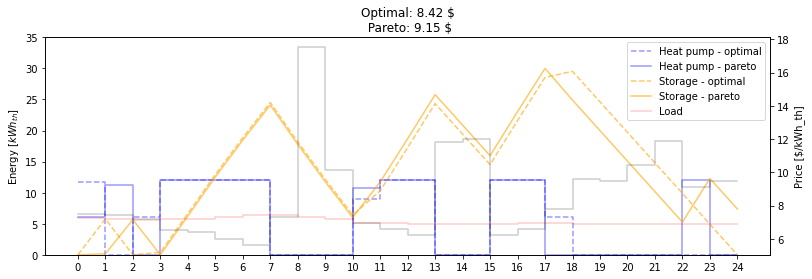

In [12]:
# With a large storage, pareto is good
comparison(max_storage=30)

### 6.2 - Reduced storage (20 kWh and below)

Academic license - for non-commercial use only
The load is not satisfied from 10 to 11
Academic license - for non-commercial use only
Pareto failed to provide load from 10:00 to 11:00


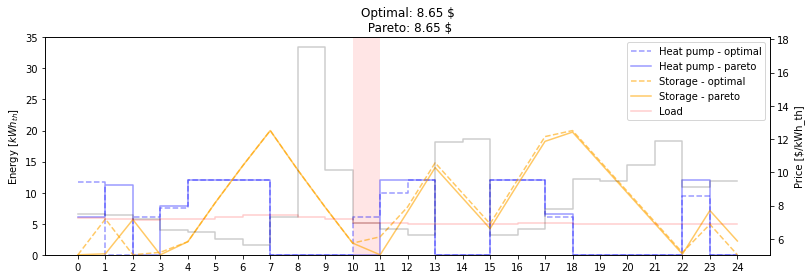

In [13]:
# As storage size decreases, pareto can fail to provide the load sometimes
comparison(max_storage=20)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
The load is not satisfied from 8 to 10
The load is not satisfied from 14 to 15
The load is not satisfied from 21 to 22
Pareto failed to provide load from 8:00 to 10:00
Pareto failed to provide load from 14:00 to 15:00
Pareto failed to provide load from 21:00 to 22:00


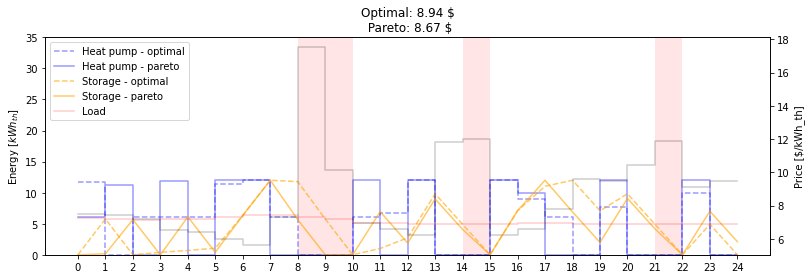

In [14]:
comparison(max_storage=12)

## 7 - Improving the pareto algorithm in cases where the load is not satisfied

### 7.1 - Option 1

In [15]:
# Idea: allow to provide heating even if it means the storage
# would be above its maximum, and make the storage saturate

def get_pareto(cost_th_list, load, max_storage, PRINT):
    
    # Ranking the hourly costs ($/kWh_th)
    ranking = [sorted(cost_th_list).index(x) for x in cost_th_list]
    if PRINT: print(f"Ranking hours by $/kWh_th:\n{ranking}\n")
    
    # Initialize
    storage = [0 for i in range(N+1)]
    Q_HP = [0 for i in range(N)]
    problem_solved = False
    ok = [1]*N
    last_not_ok = N-2
    testing = [round(x,4) for x in storage]
    
    #------------------------------------------------------
    # For the first hour
    #------------------------------------------------------
    
    # If the storage can not provide the first hour
    if load[0] > storage[0]:
        # Try to supply the exact remaining load with the HP
        if load[0] - storage[0] > Q_HP_min_list[0]: 
            Q_HP[0] = load[0] - storage[0]
        else: 
            Q_HP[0] = Q_HP_min_list[0]
    
    # Update the state of the system
    for j in range(N):
        if Q_HP[j]-load[j]+storage[j] >= 0:
            storage[j+1] = Q_HP[j]-load[j]+storage[j]
            ok[j] = 0
    
    #------------------------------------------------------
    # For all other hours, by ranking
    #------------------------------------------------------
    
    for i in range(N):
    
        # The first hour has already been treated
        if ranking.index(i) == 0: 
            continue
    
        if PRINT: 
            print("-----------------------------------")
            print(f"{ranking.index(i)}:00-{ranking.index(i)+1}:00, the cheapest hour n°{i+1}")
            print("-----------------------------------")
    
        # Skip if the hour is past a point where everything is ok
        if ranking.index(i) > last_not_ok:
            if PRINT: 
                print(f"Everything is OK after {last_not_ok+1}:00")
                print(f"There is no point in using the HP at {ranking.index(i)}:00.")
            continue
    
        #------------------------------------------------------
        # Use the maximum Q_HP you can in the best remaining hour
        #------------------------------------------------------
        
        # Try the maximum Q_HP
        Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)]
    
        for j in range(N):
                if Q_HP[j]-load[j]+storage[j] >= 0:
                    storage[j+1] = Q_HP[j]-load[j]+storage[j]
                    if storage[j+1] >= max_storage:
                        storage[j+1] = max_storage
                    ok[j] = 0
         
        #------------------------------------------------------
        # Identify if the load is satisfied after a certain time
        #------------------------------------------------------
    
        # Is the system now ok after a certain hour?
        if sum(ok)>=1:
            last_not_ok = len(ok) - ok[::-1].index(1) - 1
            
        # If all loads are satisfied
        if sum(ok)==0:    
            if PRINT: print("\n***************\nProblem solved!\n***************")
            problem_solved = True
            break
            
        #------------------------------------------------------
        # Plot the current iteration
        #------------------------------------------------------
    
        if PRINT:

            # Duplicate the last element of the hourly data for the plot
            cost_th_list2 = cost_th_list + [cost_th_list[-1]]
            Q_HP2 = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
            load2 = load + [load[-1]]

            # Plot the current state of the system
            fig, ax = plt.subplots(1,1, figsize=(13,4))
            ax2 = ax.twinx()
            ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
            ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
            ax.step(range(N+1), Q_HP2, where='post', color='blue', alpha=0.5, label='HP')
            ax.plot(storage, color='orange', alpha=0.6, label='Storage')
            ax.set_ylim([0,35])
            ax.set_xticks(range(N+1))
            ax.set_xlabel("Time [hours]")
            ax.set_ylabel("Heat [kWh_th]")
            ax2.set_ylabel("Price [cts/kWh_th]")
            lines1, labels1 = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax.legend(lines1 + lines2, labels1 + labels2)
            plt.show()

    # If there are some remaining problems
    if not problem_solved:
        start_idx = None
        for i, value in enumerate(ok):
            if value == 1 and start_idx is None:
                start_idx = i
            elif value == 0 and start_idx is not None:
                print(f"The load is not satisfied from {start_idx} to {i}")
                start_idx = None

    # Calculate the total cost and energy
    total_cost = 0
    for i in range(N):
        total_cost += Q_HP[i]*cost_th_list[i]
    total_cost = round(total_cost/100,2)
    total_energy = round(sum(load),1)

    return Q_HP, storage, ok, total_cost, total_energy

Maximum storage: 20kWh
Academic license - for non-commercial use only
Academic license - for non-commercial use only


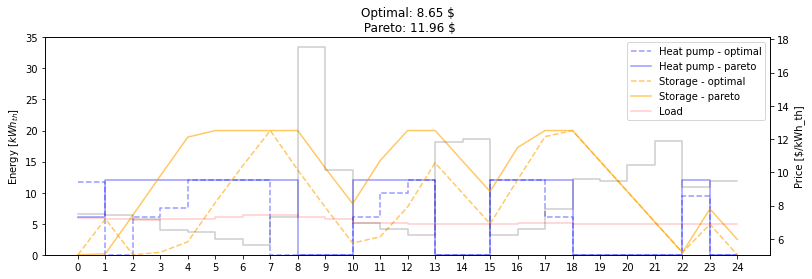

Maximum storage: 12kWh
Academic license - for non-commercial use only
Academic license - for non-commercial use only


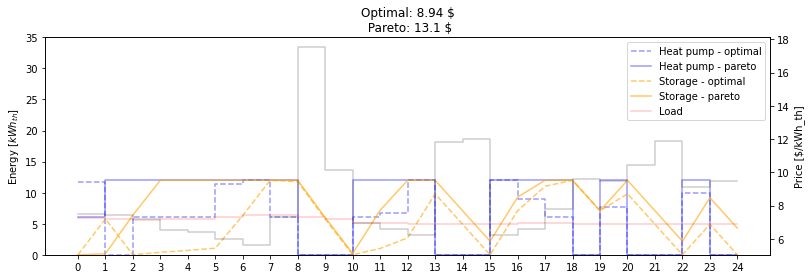

In [16]:
print("Maximum storage: 20kWh")
comparison(max_storage=20)
print("Maximum storage: 12kWh")
comparison(max_storage=12)

### 7.2 - Option 2

In [17]:
# In the case where there are unsatisfied loads
# Allow to turn on remaining hours even if storage[j+1] >= 12
off = [True if x==0 else False for x in Q_HP]

In [18]:
def get_pareto(cost_th_list, load, max_storage, PRINT):
    
    # Ranking the hourly costs ($/kWh_th)
    ranking = [sorted(cost_th_list).index(x) for x in cost_th_list]
    if PRINT: print(f"Ranking hours by $/kWh_th:\n{ranking}\n")
    
    # Initialize
    storage = [0 for i in range(N+1)]
    Q_HP = [0 for i in range(N)]
    problem_solved = False
    ok = [1]*N
    last_not_ok = N-2
    testing = [round(x,4) for x in storage]
    
    #------------------------------------------------------
    # For the first hour
    #------------------------------------------------------
    
    # If the storage can not provide the first hour
    if load[0] > storage[0]:
        # Try to supply the exact remaining load with the HP
        if load[0] - storage[0] > Q_HP_min_list[0]: 
            Q_HP[0] = load[0] - storage[0]
        else: 
            Q_HP[0] = Q_HP_min_list[0]
    
    # Update the state of the system
    for j in range(N):
        if Q_HP[j]-load[j]+storage[j] >= 0:
            storage[j+1] = Q_HP[j]-load[j]+storage[j]
            ok[j] = 0
    
    #------------------------------------------------------
    # For all other hours, by ranking
    #------------------------------------------------------
    
    for i in range(N):
    
        # The first hour has already been treated
        if ranking.index(i) == 0: 
            continue
    
        if PRINT: 
            print("-----------------------------------")
            print(f"{ranking.index(i)}:00-{ranking.index(i)+1}:00, the cheapest hour n°{i+1}")
            print("-----------------------------------")
    
        # Skip if the hour is past a point where everything is ok
        if ranking.index(i) > last_not_ok:
            if PRINT: 
                print(f"Everything is OK after {last_not_ok+1}:00")
                print(f"There is no point in using the HP at {ranking.index(i)}:00.")
            continue
    
        #------------------------------------------------------
        # Use the maximum Q_HP you can in the best remaining hour
        #------------------------------------------------------
        
        # Try the maximum Q_HP
        Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)]
    
        # Check if this violates the max storage constraint
        total_violation = 0
        testing = [round(x,4) for x in storage]
        for j in range(N):
            if Q_HP[j]-load[j]+testing[j] >= 0:
                testing[j+1] = Q_HP[j]-load[j]+testing[j]
                if testing[j+1] > max_storage:
                    # print(f"Violation: {round(testing[j+1]-max_storage,1)} kW too much")
                    total_violation += testing[j+1]-max_storage
    
        # If the maximum heating power can be used
        if total_violation == 0:
            if PRINT: print(f"The maximum Q_HP can be used at this time.")
            for j in range(N):
                if Q_HP[j]-load[j]+storage[j] >= 0:
                    storage[j+1] = Q_HP[j]-load[j]+storage[j]
                    ok[j] = 0
    
        # If the max storage is violated
        else:
            if PRINT: print(f"Need to use {round(total_violation,1)} less kW than the maximum.")
            
            # See if you can reduce the Q_HP at that time
            if Q_HP_max_list[ranking.index(i)] - total_violation > Q_HP_min_list[ranking.index(i)]:
                if PRINT: print(f"Feasible, reduced the HP power.")
                Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)] - total_violation
                for j in range(N-1):
                    if Q_HP[j]-load[j]+storage[j] >= 0:
                        storage[j+1] = Q_HP[j]-load[j]+storage[j]
                        ok[j] = 0
                
            # If not, turn off the HP at that time
            else:
                if PRINT: print(f"Infeasible, turned off the HP at this time.")
                Q_HP[ranking.index(i)] = 0
                for j in range(N):
                    if Q_HP[j]-load[j]+storage[j] >= 0:
                        storage[j+1] = Q_HP[j]-load[j]+storage[j]
                        ok[j] = 0
         
        #------------------------------------------------------
        # Identify if the load is satisfied after a certain time
        #------------------------------------------------------
    
        # Is the system now ok after a certain hour?
        if sum(ok)>=1:
            last_not_ok = len(ok) - ok[::-1].index(1) - 1
            
        # If all loads are satisfied
        if sum(ok)==0:    
            if PRINT: print("\n***************\nProblem solved!\n***************")
            problem_solved = True
            break
            
        #------------------------------------------------------
        # Plot the current iteration
        #------------------------------------------------------
    
        if PRINT:

            # Duplicate the last element of the hourly data for the plot
            cost_th_list2 = cost_th_list + [cost_th_list[-1]]
            Q_HP2 = [round(x,3) for x in Q_HP + [Q_HP[-1]]]
            load2 = load + [load[-1]]

            # Plot the current state of the system
            fig, ax = plt.subplots(1,1, figsize=(13,4))
            ax2 = ax.twinx()
            ax2.step(range(N+1), cost_th_list2, where='post', color='gray', alpha=0.6, label='Cost per kWh_th')
            ax.step(range(N+1), load2, where='post', color='red', alpha=0.4, label='Load')
            ax.step(range(N+1), Q_HP2, where='post', color='blue', alpha=0.5, label='HP')
            ax.plot(storage, color='orange', alpha=0.6, label='Storage')
            ax.set_ylim([0,35])
            ax.set_xticks(range(N+1))
            ax.set_xlabel("Time [hours]")
            ax.set_ylabel("Heat [kWh_th]")
            ax2.set_ylabel("Price [cts/kWh_th]")
            lines1, labels1 = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax.legend(lines1 + lines2, labels1 + labels2)
            plt.show()

    # If there are some remaining problems
    if not problem_solved:
        start_idx = None
        for i, value in enumerate(ok):
            if value == 1 and start_idx is None:
                start_idx = i
            elif value == 0 and start_idx is not None:
                print(f"The load is not satisfied from {start_idx} to {i}")
                start_idx = None

        off = [True if x==0 else False for x in Q_HP]
        remaining_ranking = [ranking[i] if off[i] else np.nan for i in range(N)]

        for i in range(N):
            if i not in remaining_ranking: continue
            if ranking.index(i) > last_not_ok: continue
            # Try the maximum Q_HP
            Q_HP[ranking.index(i)] = Q_HP_max_list[ranking.index(i)]
            if PRINT:
                print("-----------------------------------")
                print(f"{ranking.index(i)}:00-{ranking.index(i)+1}:00, the cheapest hour n°{i+1}")
                print("-----------------------------------")
            for j in range(N):
                if Q_HP[j]-load[j]+storage[j] >= 0:
                    storage[j+1] = Q_HP[j]-load[j]+storage[j]
                    if storage[j+1] > max_storage: storage[j+1] = max_storage
                    ok[j] = 0

            # Is the system now ok after a certain hour?
            if sum(ok)>=1:
                last_not_ok = len(ok) - ok[::-1].index(1) - 1
            
            # If all loads are satisfied
            if sum(ok)==0:    
                problem_solved = True
                print("Problem solved!\n")
                break
            
    # Calculate the total cost and energy
    total_cost = 0
    for i in range(N):
        total_cost += Q_HP[i]*cost_th_list[i]
    total_cost = round(total_cost/100,2)
    total_energy = round(sum(load),1)

    return Q_HP, storage, ok, total_cost, total_energy

Academic license - for non-commercial use only
The load is not satisfied from 10 to 11Academic license - for non-commercial use only

Problem solved!



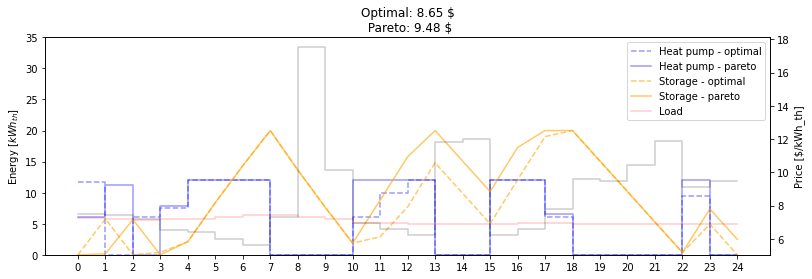

Academic license - for non-commercial use only
The load is not satisfied from 8 to 10
The load is not satisfied from 14 to 15
The load is not satisfied from 21 to 22
Problem solved!

Academic license - for non-commercial use only


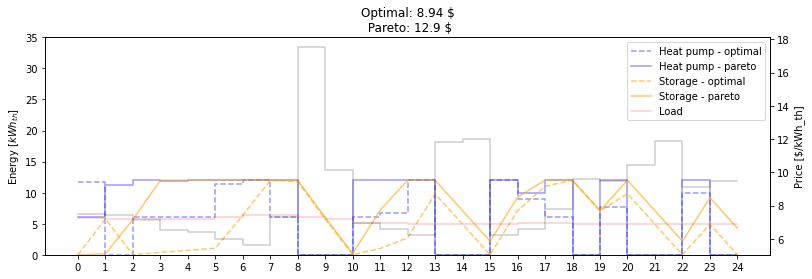

In [19]:
comparison(max_storage=20)
comparison(max_storage=12)